In [1]:
!pip install utility

  Preparing metadata (setup.py) ... done
  Created wheel for utility: filename=utility-1.0-py3-none-any.whl size=3804 sha256=6368a169f738da4169a36ae5b756908155b325dee02734a0691ac30d5a22b592
  Stored in directory: /root/.cache/pip/wheels/e5/f5/50/6624c9be2f958eca2fa2dc9fc635dedf9b1ec5b8ddbb46bb02
Successfully built utility


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import gdown

In [3]:
!gdown --id 1PtXkvzRXI0-znvSZWoGyBHhlEKmgfSZ3
!gdown --id 1GbpceVx32_fFzghwC9wHuOyiT-k35pN4

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1PtXkvzRXI0-znvSZWoGyBHhlEKmgfSZ3
From (redirected): https://drive.google.com/uc?id=1PtXkvzRXI0-znvSZWoGyBHhlEKmgfSZ3&confirm=t&uuid=8f06e71b-9a1a-4b77-a4d3-ce6632ffbecc
To: /content/haarcascade_frontalface_alt.xml
100% 677k/677k [00:00<00:00, 59.6MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1GbpceVx32_fFzghwC9wHuOyiT-k35pN4
From (redirected): https://drive.google.com/uc?id=1GbpceVx32_fFzghwC9wHuOyiT-k35pN4&confirm=t&uuid=4d6456f8-d2aa-4a13-8773-378ea2ca2940
To: /content/haarc

In [4]:
# Cascades for detection of face and eyes
face_cascade = cv.CascadeClassifier('/content/haarcascade_frontalface_alt.xml')
eye_cascade  = cv.CascadeClassifier('/content/haarcascade_eye.xml')

In [5]:
glasses  = cv.imread('/content/sportsunglasses.png', -1)

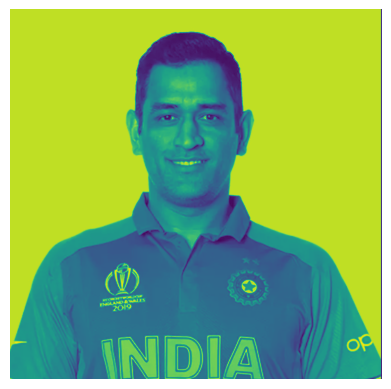

In [6]:
image = cv.imread('/content/thalaindia.jpg', cv.IMREAD_COLOR)

# Converting image into grayscale for fast computing
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.axis("off");

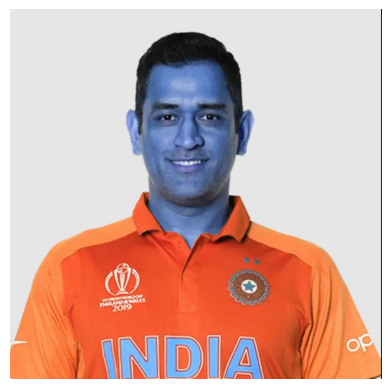

In [7]:
# Making image compatible with transparent background images
image = cv.cvtColor(image, cv.COLOR_BGR2BGRA)
plt.axis("off")
plt.imshow(image);

In [8]:
face = face_cascade.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5) # Face Detection

fx, fy, fw, fh = face[0]
roi_face  = gray[fy : fy + fh, fx : fx + fw]  # Region of interest for further computation

roi_color = image[fy : fy + fh, fx : fx + fw] # Region of interes to apply props on

In [9]:
# Eyes Detection

eyes = eye_cascade.detectMultiScale(roi_face, scaleFactor = 1.1, minNeighbors = 5)

#Features extraction
ex, ey, ew, eh = eyes[0]

In [10]:
import cv2 as cv

def image_resize(image, width = None, height = None, inter = cv.INTER_AREA):
    # iter stands for interpolation, useful in image resize
    # initialize the dimensions & grab the image size

    dim = None
    (h, w) = image.shape[:2] # First 2 channels are of only use


    if width is None and height is None:
        # Return image as it is
        return image


    if width is None:
        # Calculate Compression ratio
        r = height / float(h)
        dim = (int(w * r), height)


    else:
        # Compression ratio
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv.resize(image, dim, interpolation = inter)
    # return the resized image
    return resized

## Applying Glasses over Face

In [11]:
roi_eyes = roi_face[ey : ey + eh, ex : ex + ew]
glasses2 = image_resize(glasses.copy(), width = ew)

gw, gh, gc = glasses2.shape
for i in range(0, gw):
    for j in range(0, gh):
        # If it is not transparent
        if glasses2[i,j][3] != 0:
            roi_color[ey + i, ex + j] = glasses2[i,j]

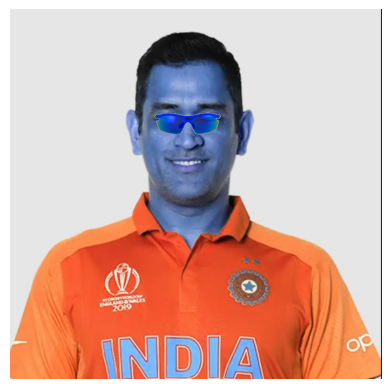

In [12]:
plt.imshow(image)
plt.axis("off");

## Coverting Color back to RGB

In [13]:
image = cv.cvtColor(image, cv.COLOR_BGRA2RGB)

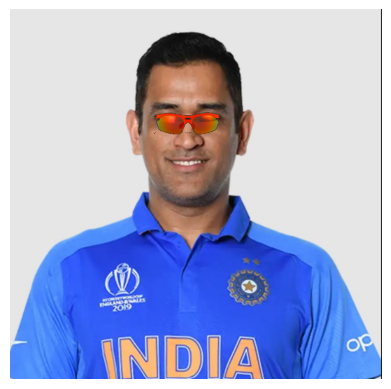

In [14]:
plt.imshow(image)
plt.axis("off");